<a href="https://colab.research.google.com/github/fahimfaruque/PS4HouseDataExercise/blob/master/Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [47]:
data = pd.read_csv('https://raw.githubusercontent.com/fahimfaruque/PS4HouseDataExercise/master/train.csv')
data.shape
train = data.iloc[0:2000,:]

train.to_json('housedata.json')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# New Section

In [48]:
# investigate Sale Price
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

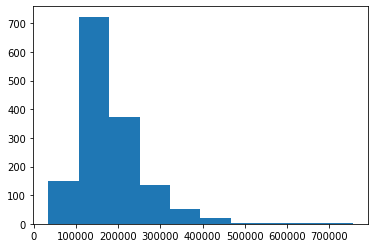

In [49]:
# plot hist
plt.hist(train['SalePrice'])

In [50]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(1460, 38)

In [51]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:10].index
cols
type(cols)

pandas.core.indexes.base.Index

In [52]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,7,1710,2,548,856,856,2,8,2003
1,6,1262,2,460,1262,1262,2,6,1976
2,7,1786,2,608,920,920,2,6,2001
3,7,1717,3,642,756,961,1,7,1915
4,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999
1456,6,2073,2,500,1542,2073,2,7,1978
1457,7,2340,1,252,1152,1188,2,9,1941
1458,5,1078,1,240,1078,1078,1,5,1950


In [53]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [54]:
# How good is the model
model.score(X,Y)


0.770302545034713

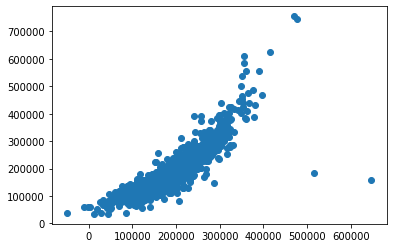

In [55]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [56]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

data = pd.read_csv('https://raw.githubusercontent.com/fahimfaruque/PS4HouseDataExercise/master/test.csv')
data.shape

test = data.iloc[0:2000,:]

test.to_json('testhousedata.json')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml
2,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [57]:
# select numeric columns
# calculate correlation factor

numeric = test.select_dtypes(include=[np.number])
numeric.shape

(460, 37)

In [58]:
numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1001,20,74.0,10206,3,3,1952,1952,0.0,0,...,528,0,0,0,0,0,0,0,7,2009
1,1002,30,60.0,5400,5,6,1920,1950,0.0,0,...,216,0,20,94,0,0,0,0,1,2007
2,1003,20,75.0,11957,8,5,2006,2006,53.0,24,...,824,144,104,0,0,0,0,0,7,2008
3,1004,90,NaN,11500,5,6,1976,1976,164.0,0,...,528,0,0,0,0,0,0,0,6,2007
4,1005,120,43.0,3182,7,5,2005,2006,16.0,16,...,457,156,0,0,0,0,0,0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [64]:
 newcols = cols.drop(['SalePrice'])
 X = test[newcols]
 X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,3,944,2,528,0,944,1,4,1952
1,5,691,1,216,691,691,1,4,1920
2,8,1574,3,824,1574,1574,2,7,2006
3,5,1680,2,528,1680,1680,2,8,1976
4,7,1504,2,457,1346,1504,2,7,2005
...,...,...,...,...,...,...,...,...,...
455,6,1647,2,460,953,953,2,7,1999
456,6,2073,2,500,1542,2073,2,7,1978
457,7,2340,1,252,1152,1188,2,9,1941
458,5,1078,1,240,1078,1078,1,5,1950


In [65]:
SalesPrice = model.predict(X)

In [66]:
SalesPrice

array([ 63214.39691753,  75621.75241343, 267179.68681501, 187998.64958975,
       220992.23114466, 116210.25404721, 204352.54701495,  88594.78059169,
       242457.05480572, 111465.02662424, 111770.58003312, 121891.19077436,
       139659.97232315, 101086.92194627, 139540.24315335, 229924.38387181,
       221316.25083168, 230068.97860537, 185408.5935939 , 221270.79740656,
       135304.13140622, 202584.27499263, 114037.57496699, 220702.05424929,
       329922.96792453, 123834.35051569, 151983.26985153, 273111.37453113,
       123581.9553821 , 141380.09593153, 121572.57125303, 267886.97006027,
       302979.1888289 , 252829.79184523, 103685.44713632,  65223.70843137,
       293701.11397257, 274158.30434212,  90270.65927497,  67911.06958776,
       178323.60173891, 178649.34541689, 188963.27995312, 261630.77381536,
       323981.11026134, 108925.3071192 , 360778.75492914, 143626.46537028,
       158620.30878708,  67151.10060468, 207424.2188353 , 208666.13111861,
       201188.75238187, 1

In [67]:
SalesPrice.shape

(460,)

In [68]:
i = list(range(1001,1461))
i

[1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1063,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1136,
 1137,
 1138,
 1139,
 1140,
 1141,
 1142,
 1143,

In [69]:



df2 = pd.DataFrame(index=i,data = SalesPrice, columns=['SalesPrice'])
df2

,SalesPrice
1001,63214.396918
1002,75621.752413
1003,267179.686815
1004,187998.649590
1005,220992.231145
...,...
1456,190137.106642
1457,232305.709862
1458,219909.324256
1459,118969.952876


In [70]:
df2.to_csv('predictions.csv')